In [60]:
#importing important files and necessary functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [61]:
#importing the dataset
dataset = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [62]:
#finding more information on each column
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [63]:
#fetch the car name
dataset['name']=dataset['name'].str.split(' ').str.slice(0,1).str.join(' ')

<ipython-input-64-0812786348b1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


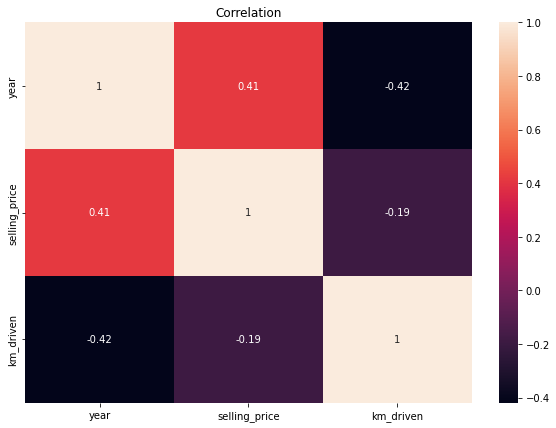

In [64]:
#Non-Categorical values' correlation graph
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(), annot=True)
plt.title('Correlation')
plt.show()

In [65]:
dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [66]:
dataset[dataset['km_driven']>3e5]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
69,Chevrolet,2010,280000,350000,Diesel,Individual,Manual,Second Owner
525,Maruti,2016,665000,560000,Diesel,Dealer,Manual,First Owner
1243,Maruti,2009,250000,806599,Petrol,Dealer,Manual,First Owner
1674,Volkswagen,2011,350000,312000,Diesel,Individual,Manual,Third Owner
2394,Toyota,2009,350000,350000,Diesel,Individual,Manual,First Owner
3679,Toyota,2006,400000,400000,Diesel,Individual,Manual,Third Owner
3718,Toyota,2009,420000,347089,Diesel,Dealer,Manual,First Owner
4184,Maruti,2016,665000,560000,Diesel,Dealer,Manual,First Owner


In [67]:
dataset=dataset[dataset['km_driven']<3e5].reset_index(drop=True)
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4322,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4323,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4324,Maruti,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4325,Hyundai,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [68]:
dataset=dataset[dataset['selling_price']<6e6].reset_index(drop=True)

In [69]:
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4320,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4321,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4322,Maruti,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4323,Hyundai,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [70]:
dataset.describe()


,year,selling_price,km_driven
count,4325.000000,4.325000e+03,4325.000000
mean,2013.099884,5.009879e+05,65241.915838
std,4.213729,5.530250e+05,42223.348231
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.049990e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,5.500000e+06,296823.000000


In [71]:
y=dataset['selling_price']

In [72]:
X=dataset[['year','km_driven','fuel','seller_type','transmission','owner']]


In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
#creating dummies

In [75]:
fuel = dataset['fuel']
fuel = pd.get_dummies(fuel, drop_first=True )
fuel

,Diesel,Electric,LPG,Petrol
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
4320,1,0,0,0
4321,1,0,0,0
4322,0,0,0,1
4323,1,0,0,0


In [76]:
gears = dataset['transmission']
gears=pd.get_dummies(gears, drop_first=True )
gears

,Manual
0,1
1,1
2,1
3,1
4,1
...,...
4320,1
4321,1
4322,1
4323,1


In [77]:
owners=dataset['owner']
owners=pd.get_dummies(owners, drop_first=True )
owners

,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,1,0,0
...,...,...,...,...
4320,0,1,0,0
4321,0,1,0,0
4322,0,1,0,0
4323,0,0,0,0


In [78]:
seller=dataset['seller_type']
sellers=pd.get_dummies(seller, drop_first=True )
sellers

,Individual,Trustmark Dealer
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
4320,1,0
4321,1,0
4322,1,0
4323,1,0


In [79]:
company=dataset['name']
companies=pd.get_dummies(company, drop_first=True )
companies

,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,Hyundai,...,Mercedes-Benz,Mitsubishi,Nissan,OpelCorsa,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4321,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4323,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [80]:
#year and Km_driven
year=dataset['year']
km_driven=dataset['km_driven']
year

0       2007
1       2007
2       2012
3       2017
4       2014
        ... 
4320    2014
4321    2014
4322    2009
4323    2016
4324    2016
Name: year, Length: 4325, dtype: int64

In [81]:
#concatenation
X = pd.concat([companies,year,km_driven,fuel,gears,owners] ,  axis=1)

In [82]:
X

,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,Hyundai,...,km_driven,Diesel,Electric,LPG,Petrol,Manual,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,0,0,0,0,0,0,0,0,0,0,...,70000,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,50000,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,100000,1,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,46000,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,141000,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,0,0,0,0,0,0,0,0,0,1,...,80000,1,0,0,0,1,0,1,0,0
4321,0,0,0,0,0,0,0,0,0,1,...,80000,1,0,0,0,1,0,1,0,0
4322,0,0,0,0,0,0,0,0,0,0,...,83000,0,0,0,1,1,0,1,0,0
4323,0,0,0,0,0,0,0,0,0,1,...,90000,1,0,0,0,1,0,0,0,0


In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=849)

In [85]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [86]:
scaler=MinMaxScaler()

In [87]:
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.fit_transform(X_test)

In [88]:
model=LinearRegression()

In [89]:
model.fit(X_train,y_train) 

LinearRegression()

In [90]:
y_pred = model.predict(X_test)

In [91]:
score=model.score(X_test,y_test)
score

0.7700570830849098

In [92]:
#controlling coefficients
coeff_df=pd.DataFrame(model.coef_,X.columns,columns=['coefficient'])
coeff_df

,coefficient
Audi,1.076324e+06
BMW,1.959211e+06
Chevrolet,-8.654614e+04
Daewoo,1.810770e+05
Datsun,-1.397980e+05
Fiat,-5.128232e+04
Force,-1.972708e+05
Ford,1.092968e+05
Honda,1.267787e+05
Hyundai,4.631852e+04


In [93]:
#example case
purchase_year =2017
kilometer_driven=6500
car_company_name= 'honda'
my_car = [[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,6500,0,0,1,0,0,1,0,0,0]]

best_price=(model.predict(my_car))
print(best_price)


[934071.27850348]


C:\Users\msada\Documents\python\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


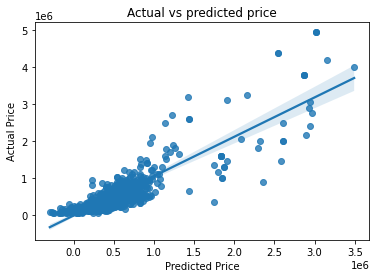

In [94]:
#plot of the prediction efficiency
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()

In [95]:
## one hot encoding for front end pickle file generation
ohe=OneHotEncoder()
X_=dataset.drop(columns='selling_price')
y=dataset['selling_price']
ohe.fit(X_[['name','fuel','seller_type','transmission','owner']])
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.10, random_state=285)

In [96]:
column_trans= make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','fuel','seller_type','transmission','owner']),remainder='passthrough')

In [97]:
pipe=make_pipeline(column_trans,model)

In [104]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
       'Jeep', 'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'OpelCorsa'...
                                                                            array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object),
                                                                            array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object),
                                                                            array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)]),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('linearregression', LinearRegression())])

In [99]:
#pickle file generation
import pickle

In [103]:
pickle.dump(pipe,open('LRModel.pkl','wb'))

In [101]:
#SAMPLE
pipe.predict(pd.DataFrame([['Maruti','Petrol','Individual','Automatic','First Owner',2019,6500]],columns=['name', 'fuel','seller_type','transmission','owner','year','km_driven']))

array([1393177.39312224])

In [102]:
dataset.to_csv('orderedcarset2.csv')